In [1]:
import numpy as np
import maze as mz
import maze2 as mz2 
import mazep3 as mz3
import pandas as pd


/home/monodox/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Problem 1

In [ ]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

mz.draw_maze(maze)

# Create an environment maze
env = mz.Maze(maze)
env2 = mz2.Maze(maze)
#env.show()

## Dynamic Programming

In [3]:
# Finite horizon
horizon = 30
# Solve the MDP problem with dynamic programming 
V, policy0= mz.dynamic_programming(env,horizon);
V2, policy02= mz2.dynamic_programming(env2,horizon);


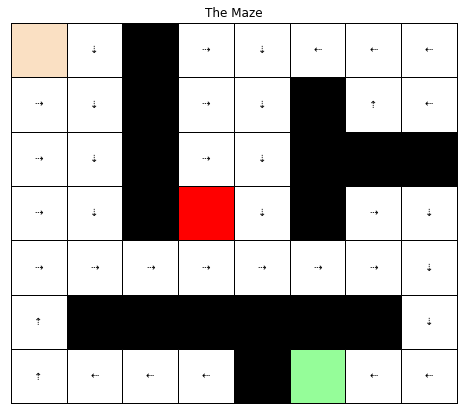

In [4]:
maze = np.array([
    [5, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 3, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env.draw_maze(maze,(3,3),policy0)

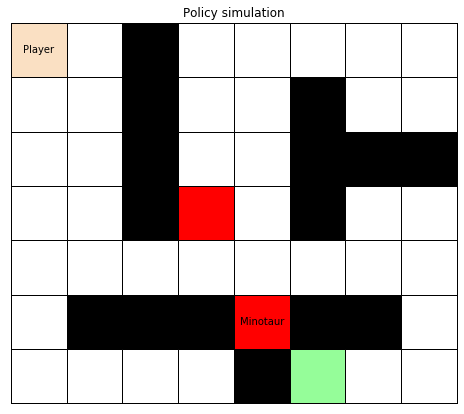

In [6]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 6, 5);
path = env.simulate(start, policy0, method, horizon);
path = env2.simulate(start, policy02, method, horizon);


# Show the shortest path
mz.animate_solution(maze, path)

In [22]:
# Model minotaur in reward
results = env.sample(start, policy0, method, horizon, 10000)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 :",results[2])

print("")
# Model minotaur in transition probability
results = env2.sample(start, policy02, method, horizon, 10000)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 :",results[2])


Probability of being eaten: 0.0
Probability exiting: 0.408
Probability of surviving the T=20 : 0.592

Probability of being eaten: 0.0813
Probability exiting: 0.8113
Probability of surviving the T=20 : 0.1074


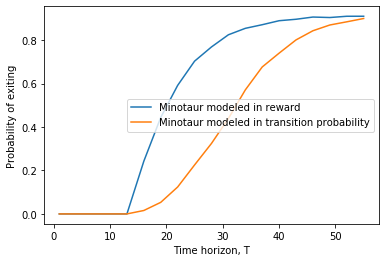

In [42]:
import matplotlib.pyplot as plt
plot_s = list()
plot_s2 = list()
plot_t = list()
for t in range(1,57,3):
    V, policy0= mz.dynamic_programming(env,t);
    V2, policy02= mz2.dynamic_programming(env2,t);
    results = env.sample(start, policy0, method, t, 10000)
    results2 = env2.sample(start, policy02, method, t, 10000)
    plot_s.append(results[1])
    plot_s2.append(results2[1])
    plot_t.append(t)
                     
plt.plot(plot_t, plot_s2, label = 'Minotaur modeled in reward')
plt.plot(plot_t, plot_s, label = 'Minotaur modeled in transition probability')
plt.xlabel("Time horizon, T")
plt.ylabel("Probability of exiting")
plt.legend()
plt.show()

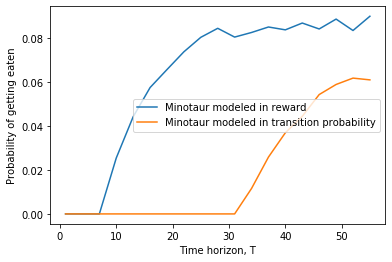

In [44]:
plot_s = list()
plot_s2 = list()
plot_t = list()
for t in range(1,57,3):
    V, policy0= mz.dynamic_programming(env,t);
    V2, policy02= mz2.dynamic_programming(env2,t);
    results = env.sample(start, policy0, method, t, 10000)
    results2 = env2.sample(start, policy02, method, t, 10000)
    plot_s.append(results[0])
    plot_s2.append(results2[0])
    plot_t.append(t)
                     
plt.plot(plot_t, plot_s2, label = 'Minotaur modeled in reward')
plt.plot(plot_t, plot_s, label = 'Minotaur modeled in transition probability')
plt.xlabel("Time horizon, T")
plt.ylabel("Probability of getting eaten")
plt.legend()
plt.show()

## Value Iteration

In [3]:
gamma   = 29.0/30.0
epsilon = 0.0001
V, policy1= mz.value_iteration(env, gamma, epsilon)
V2, policy02= mz2.value_iteration(env2,gamma, epsilon);


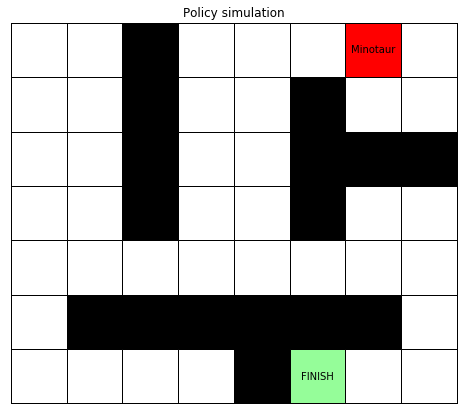

In [10]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5);
path = env.simulate(start, policy1, method, 20);
# Show the shortest path
mz.animate_solution(maze, path)

In [4]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5);

print("Modell 1")
results = env.sample(start, policy1, method, 90, 10000)
print("Expected time of exit:",results[3])

print("Modell 2")
# Model minotaur in transition probability
results = env2.sample(start, policy02, method, 90, 10000)
print("Expected time of exit:",results[3])


Modell 1
Expected time of exit: 27.6666
Modell 2
Expected time of exit: 21.2414


## Policy Iteration

In [5]:
gamma   = 0.95
V, policy2= mz.policy_iteration(env, gamma)

KeyboardInterrupt: 

In [ ]:
# Simulate the shortest path starting from position A
method = 'PolIter';
start  = (0,0, 5,5);
path = env.simulate(start, policy2, method, horizon);
# Show the shortest path
mz.animate_solution(maze, path)

In [ ]:
results = env.sample(start, policy2, method, 10000, horizon)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 steps:",results[2])

# Problem 3

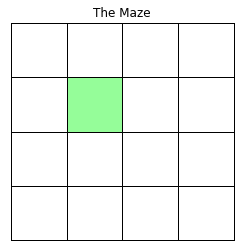

In [2]:
# Description of the maze as a numpy array
maze3 = np.array([
    [0, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]])

# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

mz3.draw_maze(maze3)
env3 = mz3.Maze(maze3)
T = 20



## Q-Learning

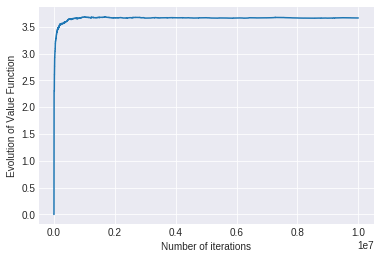

In [3]:
gamma3   = 0.8
Q, policy3 = mz3.Q_learning(env3, gamma3, 10000000)

KeyboardInterrupt: 

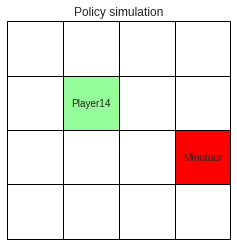

In [4]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,3,3);
path = env3.simulate(start, policy3, method,100);
# Show the shortest path
mz3.animate_solution(maze3, path)


## SARSA

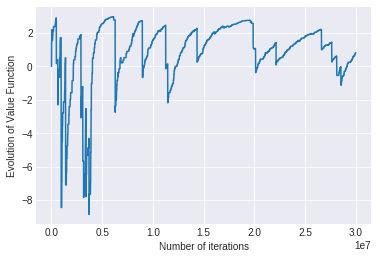

In [7]:
gamma3   = 0.8
epsilon3 = 0.1
nr = 30000000
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3, nr)

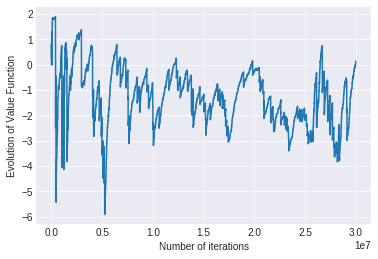

In [10]:
gamma3   = 0.8
epsilon3 = 0.2
nr = 30000000
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3, nr)

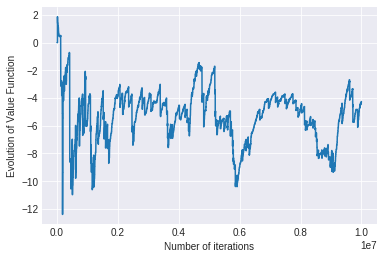

In [11]:
gamma3   = 0.8
epsilon3 = 0.3
nr = 10000000
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3, nr)

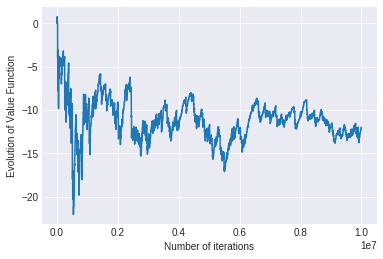

In [12]:
gamma3   = 0.8
epsilon3 = 0.4
nr = 10000000
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3, nr)

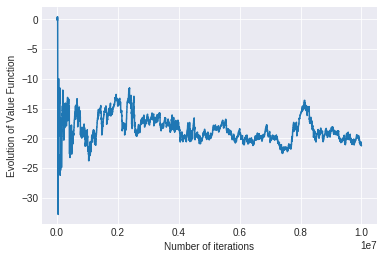

In [13]:
gamma3   = 0.8
epsilon3 = 0.5
nr = 10000000
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3, nr)

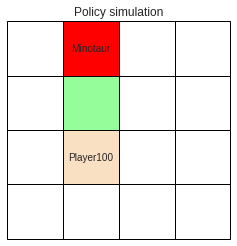

In [14]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,1,0);
path = env3.simulate(start, policy3, method,100);
# Show the shortest path
mz3.animate_solution(maze3, path)
